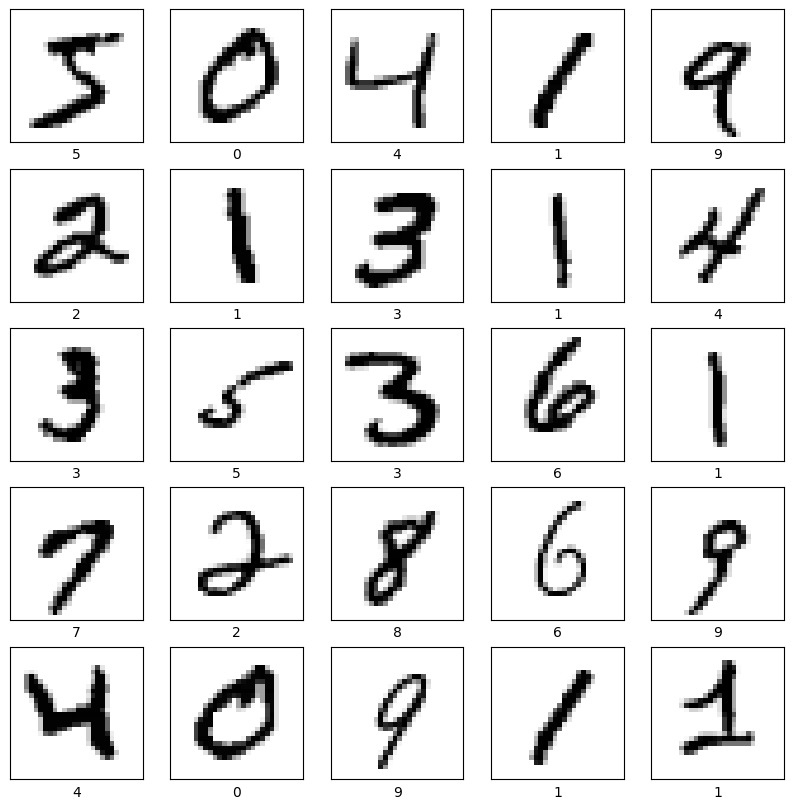

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

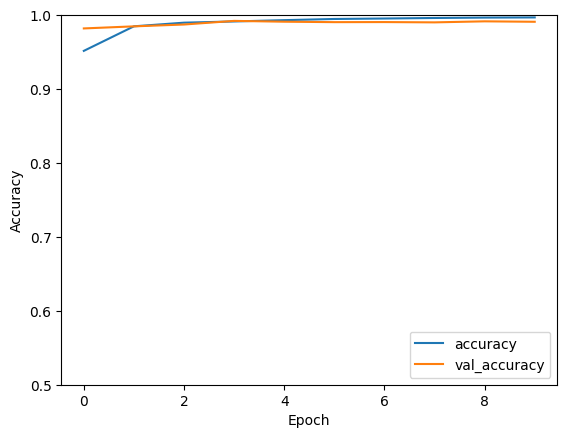

313/313 - 2s - loss: 0.0351 - accuracy: 0.9910 - 2s/epoch - 8ms/step
0.9909999966621399


In [2]:
#Actividad 6: Redes neuronales. N4 006
#Integrantes del equipo
#Bayron Javier Hernández Sifuentes 2132169
#Brisa Marlene Mar Santiago 2127823
#Leonardo Rodrigo Salinas Mejia 2035376
#Bruce Brandon Leija Cortés 1982141
#Miguel Fernando Tovar Chávez 2127889
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Cargar el conjunto de datos MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Expandir las dimensiones de las imágenes para que coincidan con la entrada esperada de Conv2D
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

# Normalizar los valores de los píxeles para que estén entre 0 y 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Visualizar las primeras 25 imágenes del conjunto de entrenamiento con sus etiquetas
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Construir el modelo
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

# Compilar el modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Graficar la precisión del entrenamiento y la precisión de validación
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)
